Jiade Song

USC ID: 9019610285

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv('dataset.csv')
df.shape

(500, 3)

In [5]:
y = df.y
x = df[['x1','x2']]

In [6]:
X_train,X_test,y_train,y_test = train_test_split(x,y,\
test_size=0.6, stratify = y, random_state = 0)

## a)

In [7]:
xy_train = X_train.copy()
xy_train['yy'] = y_train
xy_train[:10]

,x1,x2,yy
296,-0.400831,-0.262735,1
175,0.395445,-0.080027,1
354,0.481018,-0.282178,1
396,0.159821,0.093595,0
158,-0.222244,0.251504,0
85,-0.297308,-0.084682,1
416,-0.005345,-0.342398,0
38,0.223711,-0.326347,0
166,-0.436192,0.413785,0
432,-0.121241,-0.259877,0


In [8]:
xy_train_1 = xy_train[xy_train.yy == 1]
xy_train_0 = xy_train[xy_train.yy == 0]

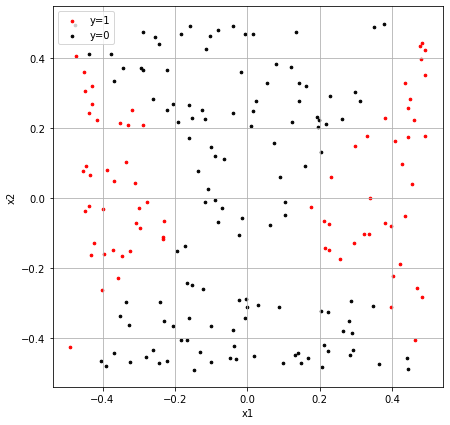

In [19]:
plt.figure(figsize = (7,7))
plt.scatter(xy_train_1.x1,xy_train_1.x2,c='r',\
            s=7,label = 'y=1')
plt.scatter(xy_train_0.x1,xy_train_0.x2,c='k',\
            s=7,label = 'y=0')

plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid()

## b)

In [10]:
m1 = LogisticRegression(solver = 'lbfgs', C=1e20)
m1.fit(X_train,y_train)

LogisticRegression(C=1e+20)

In [11]:
yhat = m1.predict(X_test)
m1.score(X_test,y_test)

0.63

The test accuracy rate is 0.63.

## c)

In [12]:
X_train_sq = X_train.copy()
X_train_sq['sqx1'] = X_train_sq['x1']**2
X_train_sq['sqx2'] = X_train_sq['x2']**2
X_train_sq[:10]

,x1,x2,sqx1,sqx2
296,-0.400831,-0.262735,0.160665,0.069030
175,0.395445,-0.080027,0.156377,0.006404
354,0.481018,-0.282178,0.231378,0.079624
396,0.159821,0.093595,0.025543,0.008760
158,-0.222244,0.251504,0.049392,0.063254
85,-0.297308,-0.084682,0.088392,0.007171
416,-0.005345,-0.342398,0.000029,0.117236
38,0.223711,-0.326347,0.050047,0.106503
166,-0.436192,0.413785,0.190263,0.171218
432,-0.121241,-0.259877,0.014699,0.067536


In [13]:
X_test_sq = X_test.copy()
X_test_sq['sqx1'] = X_test_sq['x1']**2
X_test_sq['sqx2'] = X_test_sq['x2']**2

In [14]:
m2 = LogisticRegression(solver = 'lbfgs', C=1e20)
m2.fit(X_train_sq,y_train)

LogisticRegression(C=1e+20)

In [15]:
yhat2 = m2.predict(X_test_sq)
m2.score(X_test_sq,y_test)

0.9866666666666667

The test accuracy rate is 0.9867

## d)

In [16]:
m3 = LogisticRegression(solver = 'lbfgs', C=10)
m3.fit(X_train_sq,y_train)

LogisticRegression(C=10)

In [18]:
yhat3 = m3.predict(X_test_sq)
m3.score(X_test_sq,y_test)

0.9366666666666666

The test accuracy rate is 0.9367.